**Pytorch Intro** [WIP]



Get started tutorials:
- https://pytorch.org/tutorials/
- https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html
- https://pytorch.org/tutorials/beginner/nn_tutorial.html
- https://www.kaggle.com/aakashns/pytorch-basics-linear-regression-from-scratch

Docs:
- https://pytorch.org/docs/stable/index.html

# Environment / Imports

In [25]:
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torch.nn as nn

print("PyTorch version:", torch.__version__)

PyTorch version: 1.4.0


# Pytorch LR from scratch example

This is just to introduce TF 2, has no practical usefulness - eg. you'd solve this with basic (linear) algebra, not with machine-learning and gradient-descent 😀

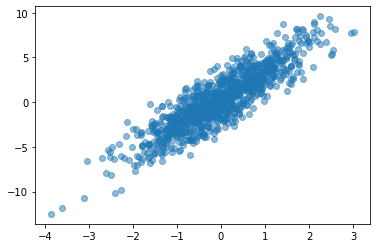

In [20]:
## generate some data
TRUE_W = 3.0
TRUE_B = 0.5
NUM_POINTS = 1000

x = torch.randn(NUM_POINTS) # : torch.Tensor
noise = torch.empty(NUM_POINTS).normal_(std=1.5)
y = x * TRUE_W + TRUE_B + noise

plt.scatter(x, y, alpha=0.5);

In [24]:
print(type(x), tuple(x.shape), x.dtype, float(x[0]), x[0])
# or more ePytorch style
print(type(x), x.size(), x.dtype, x[0].item(), x[0])

<class 'torch.Tensor'> (1000,) torch.float32 1.0158581733703613 tensor(1.0159)
<class 'torch.Tensor'> torch.Size([1000]) torch.float32 1.0158581733703613 tensor(1.0159)


In [125]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.tensor(16.0, requires_grad=True)
        self.b = torch.tensor(10.0, requires_grad=True)
    
    def forward(self, x):
        return self.w * x + self.b
    
    def predict(self, x):
        # to actually get a y that can be transformed to numpy,
        # we can either:
        # - do `.predict()` call under `with torch.no_grad():`
        # - use `detach()` on result to detach it from graph
        return self.forward(x).detach()

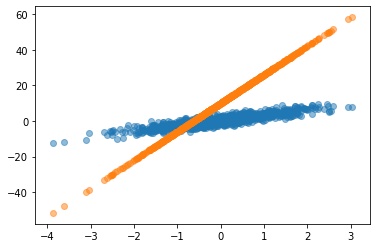

In [126]:
model = Model()

y_pred0 = model.predict(x)

plt.scatter(x, y, alpha=0.5)
plt.scatter(x, y_pred0, alpha=0.5)

In [127]:
def loss_fn(y_pred, y_true):
    return torch.mean(torch.pow(y_true - y_pred, 2))

In [155]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.tensor(16.0, requires_grad=True)
        self.b = torch.tensor(10.0, requires_grad=True)
    
    def forward(self, x):
        return self.w * x + self.b

    def predict(self, x):
        # to actually get a y that can be transformed to numpy,
        # we can either:
        # - do `.predict()` call under `with torch.no_grad():`
        # - use `detach()` on result to detach it from graph
        return self.forward(x).detach()
    
    def fit(self, x, y_true, *, epochs=20, lr=0.1):
        history = {'w': [], 'b': [], 'loss': []}
        
        for epoch in range(epochs):
            history['w'].append(self.w.detach().item())
            history['b'].append(self.b.detach().item())
        
            # predict (forward pass)
            y_pred = self.forward(x)
            loss_val = loss_fn(y_pred, y_true)
            
            # compute gradients (backward pass)
            loss_val.backward()
            
            # update parameters
            with torch.no_grad():
                self.w.sub_(lr * self.w.grad)
                self.b.sub_(lr * self.b.grad)

            # zero gradients after using them to update params
            # (by default Pytorch accumulates them!)
            self.w.grad.zero_()
            self.b.grad.zero_()
            
            loss_np = loss_val.detach().item()
            history['loss'].append(loss_np)
            print(f"Epoch {epoch}: loss={loss_val.item()}")

        history['w'].append(self.w.detach().item())
        history['b'].append(self.b.detach().item())
        loss_np = loss_fn(self.predict(x), y_true).item()
        history['loss'].append(loss_np)
        print(f"After fitting: loss={loss_np:.4f}")
        
        return history
            

In [156]:
EPOCHS = 20

In [157]:
model = Model()

In [158]:
history = model.fit(x, y, epochs=EPOCHS)

Epoch 0: loss=257.0758972167969
Epoch 1: loss=167.84051513671875
Epoch 2: loss=109.86173248291016
Epoch 3: loss=72.19110870361328
Epoch 4: loss=47.71522521972656
Epoch 5: loss=31.812387466430664
Epoch 6: loss=21.479703903198242
Epoch 7: loss=14.766152381896973
Epoch 8: loss=10.40407657623291
Epoch 9: loss=7.569843769073486
Epoch 10: loss=5.728313446044922
Epoch 11: loss=4.531782627105713
Epoch 12: loss=3.7543373107910156
Epoch 13: loss=3.2491910457611084
Epoch 14: loss=2.9209706783294678
Epoch 15: loss=2.707707405090332
Epoch 16: loss=2.569139003753662
Epoch 17: loss=2.47910213470459
Epoch 18: loss=2.420600414276123
Epoch 19: loss=2.3825881481170654
After fitting: loss=2.3579


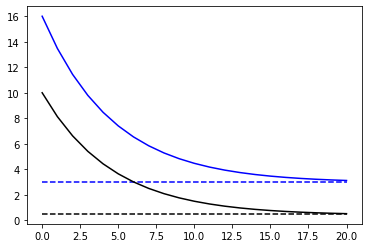

In [160]:
plt.plot(range(EPOCHS + 1), history['w'], 'b')
plt.plot(range(EPOCHS + 1), history['b'], 'k')
plt.hlines([TRUE_W, TRUE_B], 0, EPOCHS, ['b', 'k'], linestyles='--');

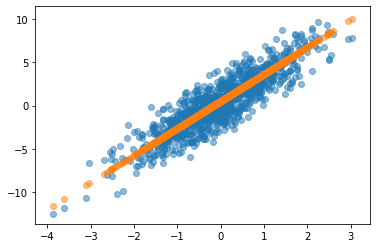

In [161]:
plt.scatter(x, y, label="true", alpha=0.5)
plt.scatter(x, model.predict(x), label="predicted", alpha=0.5);